In [1]:
#import required packages
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
from random import randrange

2021-10-20 14:26:07.489303: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-20 14:26:07.489320: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#set seed for reproducibility
np.random.seed(4)

Exercise 1: Classify images of handwritten digits

In [3]:
#####################################################
#Exercise 1: Classify images of handwritten digits
#####################################################

#fetch the data
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train_norm=x_train.reshape(60000,784).astype("float32")/255
x_test_norm=x_test.reshape(10000,784).astype("float32")/255


Below we propose an architecture A of a neural network without convolution using a softmax function as an activation function in the output layer and we implement it.
The architecture proposed is a simple feed forward neural network that with 2 hidden layers. We use 56 nodes in both hidden layers and use 10 nodes in the output layer as we have 10 numbers. A summary of the model is visible in the output of the following code. A plot is displayed further below.


In [4]:
###############
###############Architecture A of a neural network without convolution
###############

#create the input node
inputs=keras.Input(shape=(784,))

#Feed forward neural network with 2 hidden layers
#first hidden layer
#activation using the rectified linear function
hidden1=layers.Dense(56,activation='relu')(inputs)
#second hidden layer
#activation using the rectified linear function
hidden2=layers.Dense(56,activation='relu')(hidden1)
#output
outputs=layers.Dense(10,activation='softmax')(hidden2)
#define the model
model=keras.Model(inputs=inputs,outputs=outputs,name='mnist_grayscale')
#summary
model.summary()
#compile the model
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer='sgd',
    metrics=["accuracy"])

Model: "mnist_grayscale"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 56)                43960     
_________________________________________________________________
dense_1 (Dense)              (None, 56)                3192      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                570       
Total params: 47,722
Trainable params: 47,722
Non-trainable params: 0
_________________________________________________________________


2021-10-20 14:26:09.618826: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-20 14:26:09.618853: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-20 14:26:09.618873: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Hephaetus): /proc/driver/nvidia/version does not exist
2021-10-20 14:26:09.619057: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


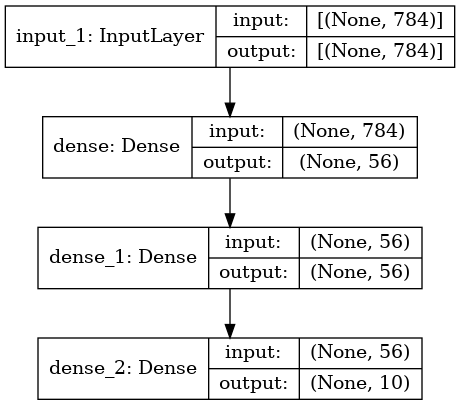

In [5]:
#illustrate with diagram using function in keras 
keras.utils.plot_model(model,show_shapes=True)

Below we train the model using 10 epochs.

In [6]:
#set the epoch number
epoch_number=10
#train the neural network on the mnist dataset (training set only)
history=model.fit(x_train_norm,y_train,batch_size=56,epochs=epoch_number,validation_split=0.2)


Epoch 1/10
  1/858 [..............................] - ETA: 2:23 - loss: 2.2991 - accuracy: 0.1429

2021-10-20 14:26:09.880856: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


858/858 [==============================] - 1s 708us/step - loss: 1.0561 - accuracy: 0.7242 - val_loss: 0.4535 - val_accuracy: 0.8820
Epoch 2/10
858/858 [==============================] - 1s 596us/step - loss: 0.4116 - accuracy: 0.8855 - val_loss: 0.3441 - val_accuracy: 0.9035
Epoch 3/10
858/858 [==============================] - 1s 590us/step - loss: 0.3404 - accuracy: 0.9033 - val_loss: 0.3107 - val_accuracy: 0.9122
Epoch 4/10
858/858 [==============================] - 1s 597us/step - loss: 0.3045 - accuracy: 0.9126 - val_loss: 0.2749 - val_accuracy: 0.9220
Epoch 5/10
858/858 [==============================] - 1s 606us/step - loss: 0.2789 - accuracy: 0.9201 - val_loss: 0.2573 - val_accuracy: 0.9271
Epoch 6/10
858/858 [==============================] - 1s 637us/step - loss: 0.2593 - accuracy: 0.9264 - val_loss: 0.2430 - val_accuracy: 0.9312
Epoch 7/10
858/858 [==============================] - 1s 632us/step - loss: 0.2423 - accuracy: 0.9308 - val_loss: 0.2309 - val_accuracy: 0.9336
Epo

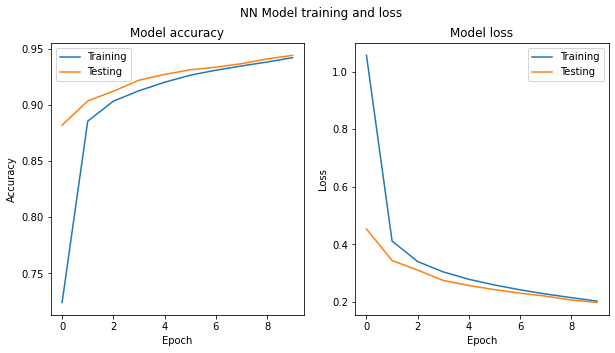

In [7]:
#plot training and validation loss and accuracy
fig,axs=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('NN Model training and loss')
axs[0].plot(range(epoch_number),history.history['accuracy'],label='Training')
axs[0].plot(range(epoch_number),history.history['val_accuracy'],label='Testing')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model accuracy')
axs[0].legend()
axs[1].plot(range(epoch_number),history.history['loss'],label='Training')
axs[1].plot(range(epoch_number),history.history['val_loss'],label='Testing')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Model loss')
axs[1].legend()
plt.legend()
plt.show()

We can see that the model's accuracy for both testing and training increases with the number of epochs and the loss of model decreases. 
We can see that testing accuracy gets close to 95%, meaning the network is correctly predicting the vast majority of numbers on unseen data.


To visualize the neural network in action we randomly choose an image from the MNIST dataset and then look at our prediction. The first block below displays the results textually and the following block displays them in a plot.

In [8]:
#choose an index 
index_of_value_to_predict=randrange(len(x_test))
#get predictions on testing data
y_hat_test=model.predict(x_test_norm)

#prediction given by the model
prediction_NN=np.where(y_hat_test[index_of_value_to_predict,:]==max(y_hat_test[index_of_value_to_predict,:]))[0][0]
print('\nThe true label of the value in the testing set is ',y_test[index_of_value_to_predict],'\nThe predicted value is ',prediction_NN,' with probability: ',max(y_hat_test[index_of_value_to_predict,:]))



The true label of the value in the testing set is  5 
The predicted value is  5  with probability:  0.97003907


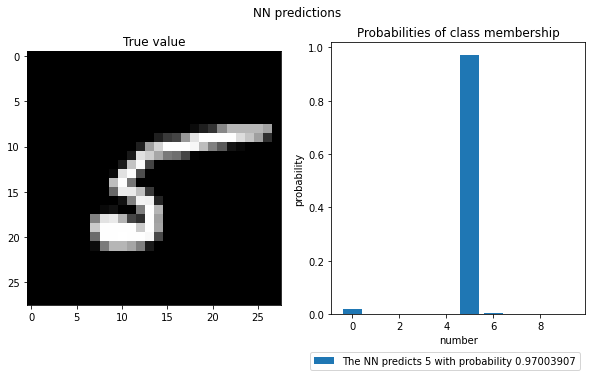

In [9]:
#View network predictions (probabilities of class membership)
#plot the number from the testing set of the given index we want to predict
fig,axs=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('NN predictions')
axs[0].imshow(x_test[index_of_value_to_predict],cmap=plt.get_cmap('gray'))
axs[0].set_title('True value')
axs[1].bar(range(0,10),list(y_hat_test[index_of_value_to_predict,:]),label='The NN predicts '+str(prediction_NN)+' with probability '+str(max(y_hat_test[index_of_value_to_predict,:])))
axs[1].legend(bbox_to_anchor=(1,-0.12))
axs[1].set_title('Probabilities of class membership')
axs[1].set_ylabel('probability')
axs[1].set_xlabel('number')
plt.show()

On the above plot we can see the true image displayed on the left. On the right side we can see the network predictions, the probabilties of class membership.
On the bottom right side we can see the number that is predicited by the network along with the exact probability it assigns to that number.

In [10]:
#evaluate on mnist dataset
scores_NN = model.evaluate(x_test_norm, y_test)
print('The NN model gives us an accuracy of '+str(scores_NN[1])+' and a loss of '+str(scores_NN[0]))


313/313 [==============================] - 0s 385us/step - loss: 0.1986 - accuracy: 0.9425
The NN model gives us an accuracy of 0.9424999952316284 and a loss of 0.19859343767166138


We now propose and implement an architecture B of a convolutional neural network. The network has two 2D convolutional layers each with 64 nodes. Along with an input and an output layer. 

In [11]:
###############
###############Architecture B of a convolutional neural network
###############

#change shape of data for convolution
x_train_dims=np.expand_dims(x_train/255,axis=-1)
x_test_dims=np.expand_dims(x_test/255,axis=-1)

#model 
#use sequential type in order to build layer by layer
model_cnn = keras.Sequential()
#add convolution layers
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(10,activation='softmax'))
model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


Below we can see the summary of the model and below that we can see the plot of model.

In [12]:
#summary
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                368650    
Total params: 406,218
Trainable params: 406,218
Non-trainable params: 0
_________________________________________________________________


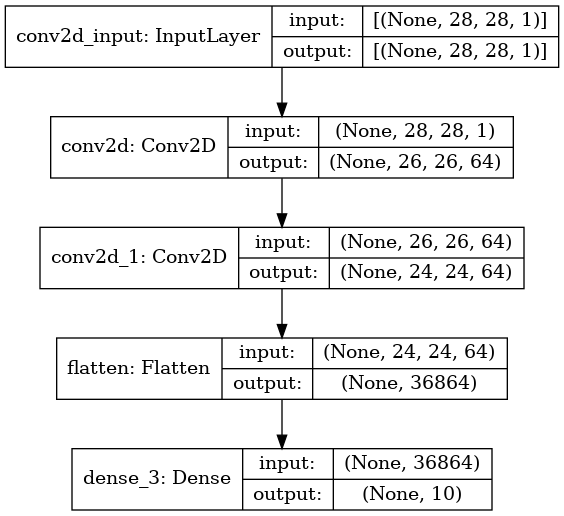

In [13]:
#illustrate with diagram using function in keras 
keras.utils.plot_model(model_cnn,show_shapes=True)

In [14]:
#set the epoch number
epoch_number=10 #this takes a long time
#fit the model
history_cnn = model_cnn.fit(x_train_dims, y_train, epochs=epoch_number,validation_split=0.2 )

Epoch 1/10
1500/1500 [==============================] - 39s 26ms/step - loss: 0.1358 - accuracy: 0.9588 - val_loss: 0.0645 - val_accuracy: 0.9806
Epoch 2/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0463 - accuracy: 0.9859 - val_loss: 0.0633 - val_accuracy: 0.9819
Epoch 3/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0294 - accuracy: 0.9901 - val_loss: 0.0507 - val_accuracy: 0.9853
Epoch 4/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0163 - accuracy: 0.9950 - val_loss: 0.0763 - val_accuracy: 0.9822
Epoch 5/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0128 - accuracy: 0.9956 - val_loss: 0.0859 - val_accuracy: 0.9818
Epoch 6/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0100 - accuracy: 0.9967 - val_loss: 0.0819 - val_accuracy: 0.9818
Epoch 7/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.0844 -

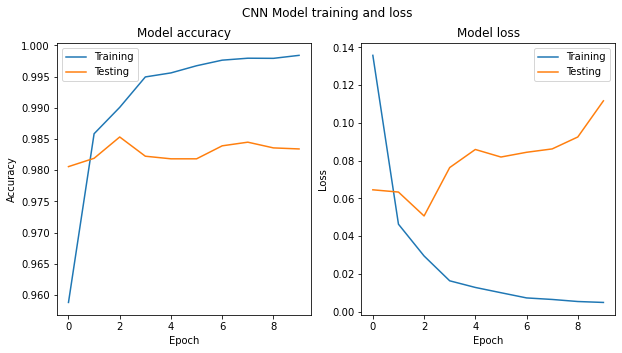

In [15]:
#plot training and validation loss and accuracy
fig,axs=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('CNN Model training and loss')
axs[0].plot(range(epoch_number),history_cnn.history['accuracy'],label='Training')
axs[0].plot(range(epoch_number),history_cnn.history['val_accuracy'],label='Testing')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model accuracy')
axs[0].legend()
axs[1].plot(range(epoch_number),history_cnn.history['loss'],label='Training')
axs[1].plot(range(epoch_number),history_cnn.history['val_loss'],label='Testing')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Model loss')
axs[1].legend()
plt.show()


We can see on the above plot that testing accuracy gets close to 99.9% and increases with the number of epochs, testing accuracy varies only slightly with each epoch but doesn't increase with each epoch. It manages to get around 99% at epoch 6. We can note that the CNN is a better model than the simple feed forward neural network.

As we did before, we choose a random image from the dataset in order to visualize the predictions of the network. The first block below displays the results textually and the following block displays them in a plot. 

In [16]:
#predictions
#choose an index 
index_of_value_to_predict_cnn=randrange(len(x_test))
#get predictions on testing data
y_hat_test_cnn=model_cnn.predict(x_test_dims)
#prediction given by the model
prediction_cnn=np.where(y_hat_test_cnn[index_of_value_to_predict_cnn,:]==max(y_hat_test_cnn[index_of_value_to_predict_cnn,:]))[0][0]
print('\nThe true label of the value in the testing set is ',y_test[index_of_value_to_predict_cnn],'\nThe predicted value using the CNN model is ',prediction_cnn, ' with probability ',str(max(y_hat_test[index_of_value_to_predict_cnn,:])))



The true label of the value in the testing set is  5 
The predicted value using the CNN model is  5  with probability  0.9549941


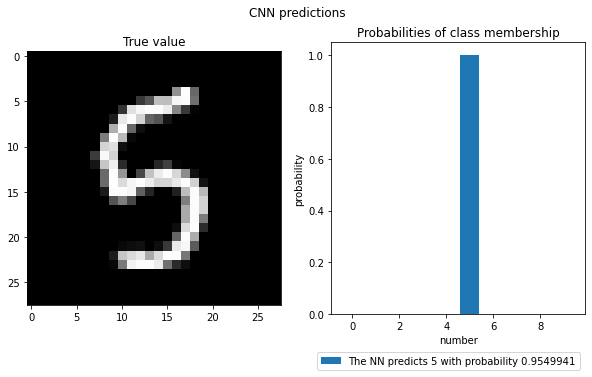

In [17]:
#View network predictions (probabilities of class membership)
fig,axs=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('CNN predictions')
axs[0].imshow(x_test[index_of_value_to_predict_cnn],cmap=plt.get_cmap('gray'))
axs[0].set_title('True value')
axs[1].bar(range(0,10),list(y_hat_test_cnn[index_of_value_to_predict_cnn,:]),label='The NN predicts '+str(prediction_cnn)+' with probability '+str(max(y_hat_test[index_of_value_to_predict_cnn,:])))
axs[1].legend(bbox_to_anchor=(1,-0.12))
axs[1].set_title('Probabilities of class membership')
axs[1].set_ylabel('probability')
axs[1].set_xlabel('number')
plt.show()

In [18]:
#evaluate the model
scores_cnn = model_cnn.evaluate(x_test_dims, y_test)
print('\nThe CNN model gives us an accuracy of '+str(scores_cnn[1])+' and a loss of '+str(scores_cnn[0]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0966 - accuracy: 0.9837

The CNN model gives us an accuracy of 0.9836999773979187 and a loss of 0.09660207480192184


Comparing the performance of the two models we can see that although the simple feed forward network performs extremly well, the convolutional network performs even better.

Exercise 2: Detect the presence of a hand-written digit on an image


In [19]:
#############################################################################
#Exercise 2: Detect the presence of a hand-written digit on an image
#############################################################################

#create random noise images
random_images=np.random.uniform(0,255,(30000,28 ,28))
#normalize data
random_images_norm=random_images.reshape(30000,784).astype("float32")/255
#make labels
#1 for digit, 0 for non digit
digit_labels=np.array([1 if i<=30000 else 0 for i in range(60000)])
#making training set for the neural network
x_train_digit=np.append(x_train_norm[:30000,:],random_images_norm,axis=0)
#shuffle the data
x_train_digit,digit_labels=shuffle(x_train_digit,digit_labels)


In the code above we generated random grayscale images using the uniform distribution. Below we plot that random noise in order to visualize it.

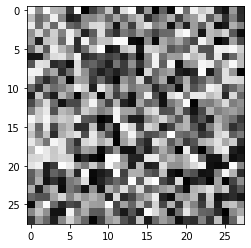

In [20]:
#show random image
plt.imshow(random_images[0],cmap=plt.get_cmap('gray'))
plt.show()

We create a simple feed forward neural network like we did in the first exercise to solve the task of recognizing whether the image is in fact a digit or not. We use 2 hidden layers each with 56 nodes. We use 2 nodes and a softmax activation function for the output layer.

In [21]:
#Feed forward neural network with 2 hidden layers
#create the input node
inputs=keras.Input(shape=(784,))
#first hidden layer
#activation using the rectified linear function
hidden1=layers.Dense(56,activation='relu')(inputs)
#second hidden layer
#activation using the rectified linear function
hidden2=layers.Dense(56,activation='relu')(hidden1)
#output
outputs=layers.Dense(2,activation='softmax')(hidden2)
#define the model
model_digit=keras.Model(inputs=inputs,outputs=outputs,name='digit_recognition')


In [22]:
#summary
model_digit.summary()

Model: "digit_recognition"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 56)                43960     
_________________________________________________________________
dense_5 (Dense)              (None, 56)                3192      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 114       
Total params: 47,266
Trainable params: 47,266
Non-trainable params: 0
_________________________________________________________________


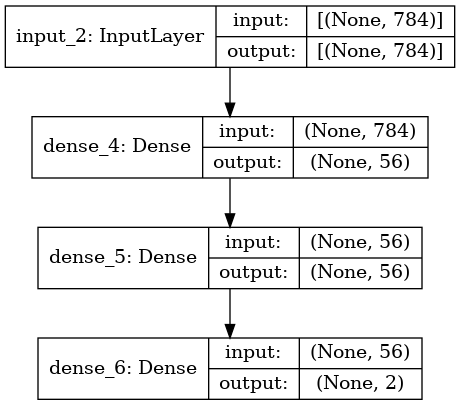

In [23]:
#illustrate with diagram using function in keras 
keras.utils.plot_model(model_digit,show_shapes=True)

In [24]:
#compile the model
model_digit.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer='sgd',
    metrics=["accuracy"])

#set the epoch number
epoch_number=5
#train the neural network on the mnist dataset (training set only)
history_digit=model_digit.fit(x_train_digit,digit_labels,batch_size=56,epochs=epoch_number,validation_split=0.2)


Epoch 1/5
858/858 [==============================] - 1s 676us/step - loss: 0.0338 - accuracy: 0.9944 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 2/5
858/858 [==============================] - 1s 593us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 3/5
858/858 [==============================] - 1s 589us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 7.6328e-04 - val_accuracy: 1.0000
Epoch 4/5
858/858 [==============================] - 1s 585us/step - loss: 8.4291e-04 - accuracy: 1.0000 - val_loss: 5.4767e-04 - val_accuracy: 1.0000
Epoch 5/5
858/858 [==============================] - 1s 594us/step - loss: 6.8570e-04 - accuracy: 1.0000 - val_loss: 4.2400e-04 - val_accuracy: 1.0000


We now create the data necessary for testing our model and then evaluate it's performance

In [25]:
#make testing data
#create random noise images
random_images_test=np.random.uniform(0,255,(10000,28 ,28))
#normalize data
random_images_norm_test=random_images_test.reshape(10000,784).astype("float32")/255
#make labels
#1 for digit, 0 for non digit
digit_labels_test=np.array([1 if i<=10000 else 0 for i in range(20000)])
#making testing set for the neural network
x_test_digit=np.append(x_test_norm[:10000,:],random_images_norm_test,axis=0)
x_test_digit,digit_labels_test=shuffle(x_test_digit,digit_labels_test)
#Evaluate the classifier’s performance using the 10, 000 MNIST test images and 10, 000 randomly
#generated images
scores = model_digit.evaluate(x_test_digit,digit_labels_test)


625/625 [==============================] - 0s 527us/step - loss: 8.5600e-04 - accuracy: 0.9999


The score is very high, the neural network manages to correctly classify whether the image is really a digit or not with 99.99% accuracy. 

In [26]:
#Propose a vizualization of the classifier’s predictions.
#we shall be using a confusion matrix
#get predictions
predictions=model_digit.predict(x_test_digit)
y_hat_digit=np.array([0 if predictions[i][0]>predictions[i][1] else 1 for i in range(len(predictions))])
#make confusion matrix
conf_matrix=confusion_matrix(digit_labels_test, y_hat_digit)
conf_matrix_df=pd.DataFrame(columns=['Predicted 1','Predicted 0'],index=['Actual 1','Actual 0'])
conf_matrix_df.iloc[0,:]=conf_matrix[0,:]
conf_matrix_df.iloc[1,:]=conf_matrix[1,:]
print(conf_matrix_df)

         Predicted 1 Predicted 0
Actual 1        9999           0
Actual 0           1       10000


The network succesfully classifies pratically all of the images.

Exercise 3: Practice on other datasets

We decided to use the fashion MNIST dataset for this exercise.

In [27]:
############################################
#Exercise 3: Practice on other datasets
############################################


#we shall be using the fashion mnist dataset
#we import the data from tensorflow
fashion_mnist = tf.keras.datasets.fashion_mnist
#we separate into testing and training data
(x_fashion_train,y_fashion_train),(x_fashion_test,y_fashion_test)= fashion_mnist.load_data()
print('The training data is of shape: ',x_fashion_train.shape)
print('The training labels are of shape: ',y_fashion_train.shape)
print('The testing data is of shape: ',x_fashion_test.shape)
print('The testing labels are of shape: ',y_fashion_test.shape)
print('There are',len(np.unique(y_fashion_train)),'labels')
#The labels each correspond to a type of clothing:
    #0-T-shirt-top
    #1 Trouser
    #2 Pullover
    #3 Dress
    #4 Coat
    #5 Sandal
    #6 Shirt
    #7 Sneaker
    #8 Bag
    #9 Ankle boot

class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


The training data is of shape:  (60000, 28, 28)
The training labels are of shape:  (60000,)
The testing data is of shape:  (10000, 28, 28)
The testing labels are of shape:  (10000,)
There are 10 labels


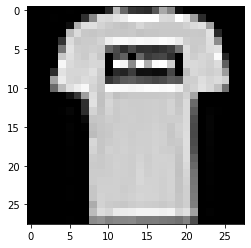

In [28]:
#view image
plt.imshow(x_fashion_train[1],cmap=plt.get_cmap('gray'))
plt.show()
#We can see it's a t-shirt

We build a convolutional neural network like the one we made in the first exercise.

In [29]:

#reshape the data
x_fashion_train=np.expand_dims(x_fashion_train/255,axis=-1)
x_fashion_test=np.expand_dims(x_fashion_test/255,axis=-1)

#sequential model
#convolutional neural network with 2 convolution layers
model_fashion=keras.Sequential()
model_fashion.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_fashion.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_fashion.add(layers.Flatten())
model_fashion.add(layers.Dense(10,activation='softmax'))
model_fashion.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])




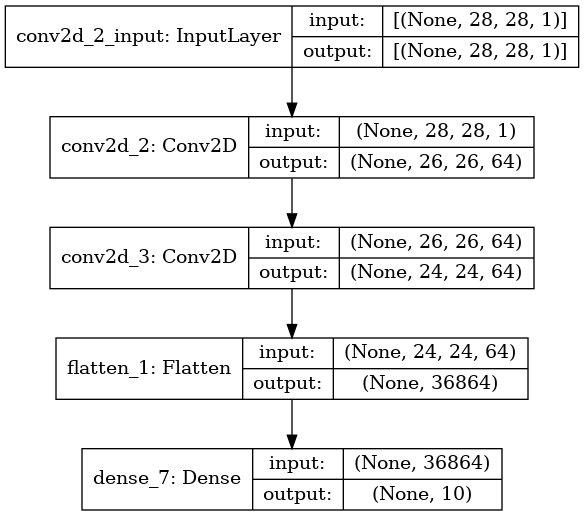

In [30]:
#illustrate with diagram using function in keras 
keras.utils.plot_model(model_fashion,show_shapes=True)


In [31]:
#summary
model_fashion.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                368650    
Total params: 406,218
Trainable params: 406,218
Non-trainable params: 0
_________________________________________________________________


In [32]:
#set the epoch number
epoch_number=5
#train the neural network on the mnist dataset (training set only)
history_fashion=model_fashion.fit(x_fashion_train,y_fashion_train,batch_size=56,epochs=epoch_number,validation_split=0.2)



Epoch 1/5
858/858 [==============================] - 35s 41ms/step - loss: 0.4200 - accuracy: 0.8511 - val_loss: 0.3196 - val_accuracy: 0.8858
Epoch 2/5
858/858 [==============================] - 35s 41ms/step - loss: 0.2763 - accuracy: 0.9024 - val_loss: 0.2725 - val_accuracy: 0.9015
Epoch 3/5
858/858 [==============================] - 35s 41ms/step - loss: 0.2232 - accuracy: 0.9189 - val_loss: 0.2619 - val_accuracy: 0.9083
Epoch 4/5
858/858 [==============================] - 35s 41ms/step - loss: 0.1819 - accuracy: 0.9340 - val_loss: 0.2521 - val_accuracy: 0.9124
Epoch 5/5
858/858 [==============================] - 35s 41ms/step - loss: 0.1469 - accuracy: 0.9467 - val_loss: 0.2670 - val_accuracy: 0.9087


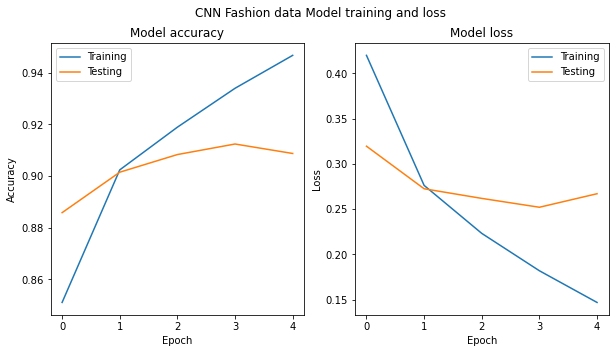

In [33]:
#plot training and validation loss and accuracy
fig,axs=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('CNN Fashion data Model training and loss')
axs[0].plot(range(epoch_number),history_fashion.history['accuracy'],label='Training')
axs[0].plot(range(epoch_number),history_fashion.history['val_accuracy'],label='Testing')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model accuracy')
axs[0].legend()
axs[1].plot(range(epoch_number),history_fashion.history['loss'],label='Training')
axs[1].plot(range(epoch_number),history_fashion.history['val_loss'],label='Testing')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Model loss')
axs[1].legend()
plt.show()

We can see on the graphs that the model works quite well managing to get close to 90% accuracy on the testing data. 

In [34]:
#evaluate the performance of the model
scores_fashion = model_fashion.evaluate(x_fashion_test,y_fashion_test)
#make predictions on testing data
y_hat_fashion_test=model_fashion.predict(x_fashion_test)



313/313 [==============================] - 1s 4ms/step - loss: 0.2801 - accuracy: 0.9069


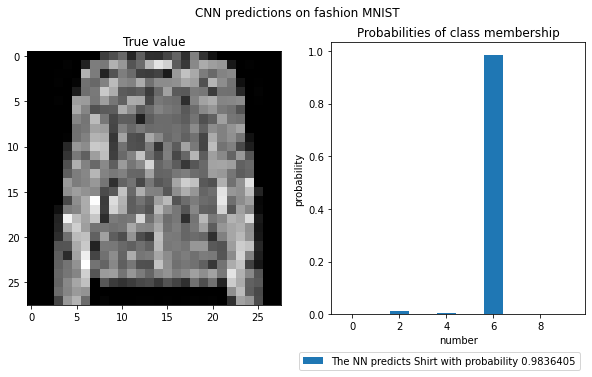

In [35]:
#visualize predictions
index_of_value_to_predict_fashion=randrange(len(x_fashion_test))
prediction_fashion=np.where(y_hat_fashion_test[index_of_value_to_predict_fashion,:]==max(y_hat_fashion_test[index_of_value_to_predict_fashion,:]))[0][0]
#make plot to visualize
fig,axs=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('CNN predictions on fashion MNIST')
axs[0].imshow(x_fashion_test[index_of_value_to_predict_fashion],cmap=plt.get_cmap('gray'))
axs[0].set_title('True value')
axs[1].bar(range(0,10),list(y_hat_fashion_test[index_of_value_to_predict_fashion,:]),label='The NN predicts '+class_names[prediction_fashion]+' with probability '+str(max(y_hat_fashion_test[index_of_value_to_predict_fashion,:])))
axs[1].legend(bbox_to_anchor=(1,-0.12))
axs[1].set_title('Probabilities of class membership')
axs[1].set_ylabel('probability')
axs[1].set_xlabel('number')
plt.show()